## Problem Set 4: CAPM

## Exercise 1

## Part (a)
In the following we will use the notation of the text.\
Every investor wants to maximize his utility: 
$$\begin{aligned}\max_{w^i}(\mathbb{E}[R_p^i]-\frac{\gamma^i}{2}V[R_p^i])\Longrightarrow 
\max_{w^i}(R_f+(w^i)^T(\mathbb{E}[R]-R_f\textbf{1})-\frac{\gamma^i}{2}(w^i)^T\Sigma(w^i))\end{aligned}$$
To find the maximum we set the first order condition equal to zero: 
$$\begin{aligned}\mu-R_f\textbf{1}=\gamma^i\Sigma(w^i)\Longrightarrow w^i=\frac{1}{\gamma^i}\Sigma^{-1}(\mu-R_f\textbf{1}) \end{aligned}$$
Multiplying  and dividing $w^i$ by $\textbf{1}^T\Sigma^{-1}(\mu-R_f\textbf{1})$, we find:
$$\begin{aligned}w^i=\frac{\textbf{1}^T\Sigma^{-1}(\mu-R_f\textbf{1})}{\gamma^i}w_{MV} \end{aligned}$$
Each investor invests in the tancengy portfolio depending on his/her risk aversion $\gamma$ and in the risk free rate. The fraction of the wealth that is invested in the risk free rate is $1-w^i$. Then, the total wealth of each investor is the sum of the dollars held in the tangency portfolio and the dollars held in the risk free asset.\
Letting: \
$W^i$=total amount of money that investor $i$ invests\
$W_0^i$=amount of money that investor $i$ invests in the risk free rate\
$W_{MV}^i$=total amount of money that investor $i$ invests in the tancency portfolio\
We have: 
$$\begin{aligned}W^i=W_0^i+W_{MV}^i\end{aligned}$$

## Part (b)
In equilibrium: 
$$\begin{aligned} \sum_{i=1}^{I}W^i_{MV}w_{MV}=M\end{aligned}$$
but we also know that:
$$\begin{aligned} M=\textbf{1}^TMw_M \text{  and  }W^i_{MV}+W^i_0=W^i\Longrightarrow W^i_{MV}=W^i-W^i_0 \end{aligned}$$
then: 
$$\begin{aligned} \sum_{i=1}^{I}W^i_{MV}w_{MV}=M\Longrightarrow\sum_{i=1}^{I}(W^i-W^i_0)w_{MV}=\textbf{1}^TMw_M\end{aligned}$$
Because of the market clearing, in general the net amount invested in the risky assets is $\textbf{1}^TM$, i.e $\sum_{i=1}^{I}W^i=\textbf{1}^TM$,\
so as a consequence: 
$$\begin{aligned} \sum_{i=1}^{I}(W^i-W^i_0)w_{MV}=\sum_{i=1}^{I}W^iw_{MV}-\sum_{i=1}^{I}W^i_0w_{MV}=\textbf{1}^TMw_M\\
\sum_{i=1}^{I}W^iw_{MV}=\textbf{1}^TMw_M \Longrightarrow \textbf{1}^TMw_{MV}=\textbf{1}^TMw_M \Longrightarrow w_{MV}=w_M\end{aligned}$$

## Point (c)
Because the market portfolio is the weighted average of all investors' portfolios, and because all investors's portfolios are mean variance efficient, then the market portfolio's excess return must be proportional to it's covariance with itself, that is, its variance:
$$
    \mu_M - R_f = a_M Var[\mu_M]
$$
We have that $Var[\mu_M] = \sigma_M^2 = w_M^T \Sigma w_M$ and then, we have $\frac{1}{a_M} = \gamma_M$ which represents aggregate risk aversion:
$$
    \gamma_M = \left(\sum_{i=1}^{I}\frac{1}{\gamma^i}\frac{W^i}{\sum_{i=1}^{I} W^i}\right)^{-1}
$$
This aggregate risk aversion is a weighted average of the individual risk aversion.

## Part (d)
From the previous part, we know that: 
$$\begin{aligned} \mu_M=R_f+\sigma^2_M\gamma_M \Longrightarrow \gamma_M=\frac{\mu_M-R_f}{\sigma^2_M}\end{aligned}$$
Furthermore, for every stock n we can write the first order condition used in point (a), where we substitued $\gamma^i$ with $\gamma^M$ since this condition holds for every agent in the world:
$$\begin{aligned} \mu_n-R_f=\gamma_M(\Sigma(w^i))_n=\gamma_M\sum_{j=1}^{N}\Sigma_{ij}w_j=\gamma_M\sum_{j=1}^{N}Cov(R_i,R_j)w_j\\
 \mu_n-R_f=\gamma_MCov(R_i,\sum_{j=1}^{N}R_jw_j) \Longrightarrow \mu_n-R_f=\gamma_MCov(R_n,R_M) \end{aligned}$$
Then, substituting the expression of $\gamma_M$ in the last equation we find: 
$$\begin{aligned} \mu_n-R_f=\frac{\mu_M-R_f}{\sigma^2_M}Cov(R_n,R_M)\Longrightarrow \mu_n=R_f+\beta_n(\mu_M-R_f)\end{aligned}$$

## Exercise 2

## a)

In [1]:
import wrds
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from datetime import datetime


In [2]:
db = wrds.Connection(wrds_username = 'nicoles')

Loading library list...
Done


In [ ]:
#1.
market = db.raw_sql(" select a.permno, a.date, b.shrcd, b.exchcd, a.ret, a.shrout, a.prc from crsp.msf as a left join crsp.msenames as b on a.permno=b.permno and b.namedt<=a.date and a.date<=b.nameendt where a.date between '01/01/1928' and '12/31/2004' and b.exchcd between 1 and 2 and b.shrcd between 10 and 11", date_cols=['date'])
market.to_csv('Market.csv')
vw_market = db.raw_sql("select date,vwretd from crsp.msi where date>='1928-01-01' and date<='2004-12-31'", date_cols=['date'])
vw_market.to_csv('VW_Market.csv')
t_bill = db.raw_sql("select mcaldt, tmytm from crsp.tfz_mth_rf where kytreasnox = 2000001")
t_bill.to_csv('T_bill.csv')


In [3]:
market = pd.read_csv('Market.csv')
vw_market = pd.read_csv('VW_Market.csv')
t_bill = pd.read_csv('T_bill.csv')

In [4]:
market['date'] = pd.to_datetime(market['date'])
market.drop(['Unnamed: 0'], axis=1, inplace=True)
market.dropna(inplace=True)

vw_market['date'] = pd.to_datetime(vw_market['date'])
vw_market.set_index('date', inplace=True)
vw_market.drop(['Unnamed: 0'], axis=1, inplace=True)
vw_market.dropna(inplace=True)

t_bill['date'] = pd.to_datetime(t_bill['mcaldt'])
t_bill.set_index('date', inplace=True)
t_bill = t_bill.loc['1928-01-01':'2004-12-31']
t_bill.drop(['mcaldt'], axis=1, inplace=True)
t_bill.drop(['Unnamed: 0'], axis=1, inplace=True)
t_bill.dropna(inplace=True) 

t_bill['tmytm'] = np.exp(t_bill['tmytm']/12/100)-1


In [5]:
df = pd.merge(market, vw_market, how='left', on='date')
df = pd.merge(df, t_bill, how='left', on='date')

In [6]:
df.sort_values('permno', inplace=True)

In [7]:
#df.groupby('permno').apply(lambda x: sm.ols(formula='(ret - tmytm) ~ vwretd - tmytm', data=x).fit())

grouped_2 = df.groupby("permno", group_keys=True).filter(lambda x: len(x) >= 60)
# filter return a dataframe not a groupby dataframe, so we need to groupby again 
grouped = grouped_2.groupby("permno", group_keys=True)
parameters = pd.DataFrame(columns=['permno','alpha','beta','R2'])
for group in grouped.groups.keys():
    data = grouped.get_group(group)
    data = data.dropna()
    y = data.ret - data.tmytm
    x = data.vwretd - data.tmytm
    x = sm.add_constant(x)
    regression = sm.OLS(y, x).fit()
    parameters.loc[len(parameters)] = [group,regression.params['const'],regression.params[0],regression.rsquared]


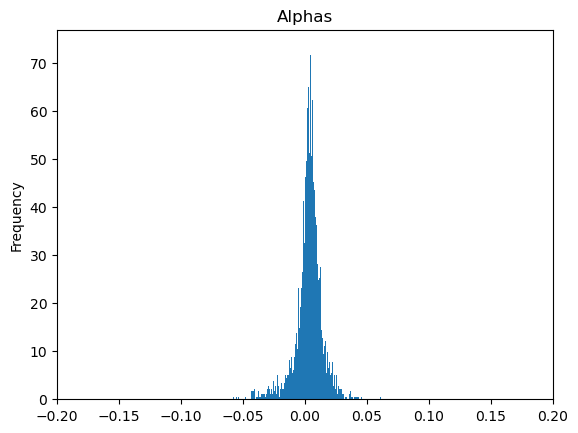

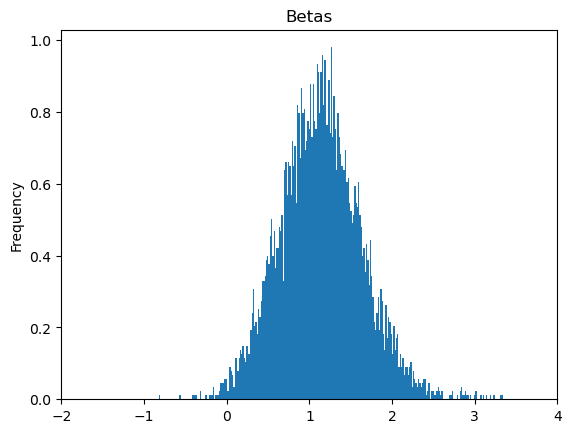

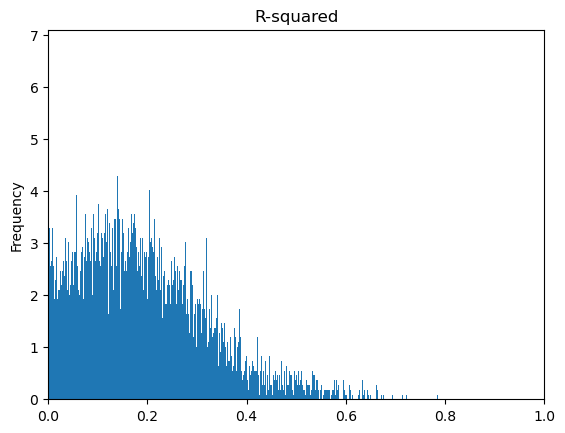

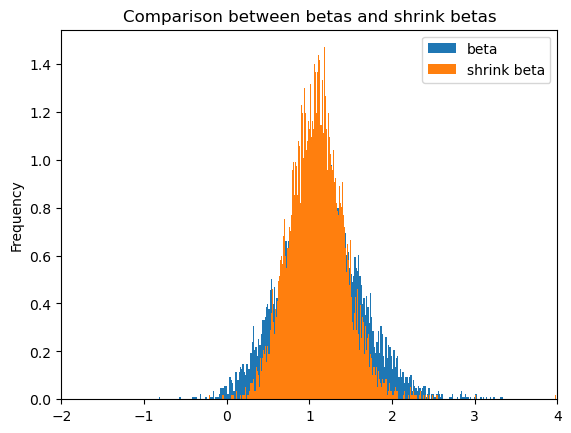

In [8]:
parameters['alpha'].plot.hist(bins=400,density=True,label='alpha histogram')
plt.xlim((-0.2,0.2))
plt.title('Alphas')
plt.show()

parameters['beta'].plot.hist(bins=400,density=True,label='beta histogram')
plt.xlim((-2,4))
plt.title('Betas')
plt.show()

parameters['R2'].plot.hist(bins=400,density=True,label='R2 histogram')
plt.xlim((0,1))
plt.title('R-squared')
plt.show()

beta_adj = parameters['beta'] * (2/3) + (1/3)
parameters['beta'].plot.hist(bins=400,density=True,label='beta')
plt.hist(beta_adj, bins=400,density=True,label='shrink beta')
plt.legend()
plt.xlim((-2,4))
plt.title('Comparison between betas and shrink betas')
plt.show()


Alphas: \
The distribution of alpha is around zero mostly concentrated between -0.03 to 0.03. Alpha measures the excess premium with respect to the CAPM; when alpha is negative then the CAPM overvalues the stock, while happen the opposite if alpha is positive. The distribution seems a bit skewed to the right, even if there are some negative alphas, below -0.05, with some frequency.

Betas: \
The distribution of beta varies a lot starting from zero and going until three; most of the values are concentrated from one to two. Beta is a measure of market related risk, the higher the beta the higher the risk premium of the stock and so is the risk of the stock. When the beta is lower than one (the beta of the market) then the stock is a defensive stock; this means that once the market goes down this stock will go down less than the market, due to its low market risk. Conversely, for higher than 1 beta stocks, the market risk is high making the stocks perform better than the market when the market is healthy, and even worse than the markey when the market does poorly.
We can also notice some isolated cases where beta is negative: in those cases stocks tend to increase their values while the market falls.
Using the shrink estimator from Bloomberg we notice that the distribution of beta has thinner tails than before; furthermore there is a higher frequency in the center of the distribution, around 1.

R-squared:\
The R-squared of the regression measures the proportion of risk related to market factors; this fraction or percentage is mostly concentrated between 10% and 30%. There are then some extreme values around 50%. All the other parts of risk are related to idiosyncratic risks or non diversifiable risks.


## b) 

In [9]:
parameters.sort_values('beta', ascending=False)

,permno,alpha,beta,R2
2812,45306.0,0.016667,5.476063,0.083258
5182,82168.0,0.057261,4.019985,0.150083
5312,84107.0,0.027055,3.322311,0.382541
2833,45532.0,0.008868,3.311183,0.204777
2940,46797.0,0.017244,3.232632,0.123640
...,...,...,...,...
4432,69868.0,0.013028,-0.392860,0.001724
4980,79435.0,0.005521,-0.423008,0.020955
1684,29129.0,0.035444,-0.553857,0.010711
4820,77200.0,0.029046,-0.571402,0.007482


In [10]:
#parameters['decile'] = pd.qcut(parameters['beta'], 10, labels=[1,2,3,4,5,6,7,8,9,10])

In [11]:
df2=df.copy()

In [12]:
df2 = df2.merge(parameters, how='left', on='permno')

In [13]:
df2.dropna(inplace=True)

In [14]:
df2.sort_values('beta', ascending=False)

,permno,date,shrcd,exchcd,ret,shrout,prc,vwretd,tmytm,alpha,beta,R2
965838,45306.0,1999-04-30,11.0,2.0,0.057971,48470.0,4.5625,0.049092,0.003717,0.016667,5.476063,0.083258
965849,45306.0,1996-04-30,11.0,2.0,-0.071429,44387.0,8.1250,0.025560,0.004038,0.016667,5.476063,0.083258
965869,45306.0,1992-06-30,11.0,2.0,-0.196429,20166.0,5.6250,-0.019258,0.002932,0.016667,5.476063,0.083258
965868,45306.0,1992-07-31,11.0,2.0,0.133333,20166.0,6.3750,0.039900,0.002567,0.016667,5.476063,0.083258
965867,45306.0,1992-08-31,11.0,2.0,-0.196078,20166.0,5.1250,-0.020819,0.002524,0.016667,5.476063,0.083258
...,...,...,...,...,...,...,...,...,...,...,...,...
1210602,60899.0,1992-06-30,11.0,2.0,-0.187500,3678.0,4.8750,-0.019258,0.002932,-0.017824,-0.817076,0.009042
1210601,60899.0,1992-07-31,11.0,2.0,-0.179487,3678.0,4.0000,0.039900,0.002567,-0.017824,-0.817076,0.009042
1210600,60899.0,1992-12-31,11.0,2.0,-0.184211,3814.0,3.8750,0.017740,0.002440,-0.017824,-0.817076,0.009042
1210599,60899.0,1992-09-30,11.0,2.0,0.039474,3814.0,-4.9375,0.012461,0.002244,-0.017824,-0.817076,0.009042


In [15]:
df2['decile'] = df2.groupby('date')[['beta']].transform(lambda x: pd.qcut(x, 10, labels=[1,2,3,4,5,6,7,8,9,10]))

In [16]:
df2.sort_values(['permno', 'date'], inplace=True)

In [17]:
df2['Market Cap']=df2['prc']*df2['shrout']

In [18]:
##count the number of stocks in each decile for each month
#df2.groupby(['date','decile']).count()['/permno']

In [19]:
#Compute the market cap weights vw = Market Cap / Sum of Market cap for each stock in each decile for each month
df2['vw']=df2.groupby(['date','decile'])['Market Cap'].transform(lambda x: x/x.sum())

#Compute the returns using the market cap weights for each stock in each decile for each month of last month
df2['vwret']=df2.groupby(['permno'])['vw'].transform(lambda x: (x.shift(1)))*df2['ret']

# Compute the equal weight returns for each stock in each decile where each stock has a weight of 1/ the number of stocks in each decile
df2['eqwret']=df2.groupby(['date','decile'])['ret'].transform(lambda x: 1/len(x))*df2['ret']


In [20]:
df2.sort_values(['date', 'decile'])

,permno,date,shrcd,exchcd,ret,shrout,prc,vwretd,tmytm,alpha,beta,R2,decile,Market Cap,vw,vwret,eqwret
1069,10014.0,1928-01-31,10.0,1.0,2.875000,1400.0,3.875000,-0.00334,0.003335,0.008941,0.667466,0.053614,1,5.425000e+03,0.001165,NaN,0.058673
11792,10225.0,1928-01-31,11.0,1.0,-0.041488,1148.0,167.500000,-0.00334,0.003335,0.003773,0.695027,0.345999,1,1.922900e+05,0.041299,NaN,-0.000847
14874,10292.0,1928-01-31,10.0,1.0,-0.017123,187.0,71.750000,-0.00334,0.003335,0.007782,0.644454,0.375480,1,1.341725e+04,0.002882,NaN,-0.000349
19340,10401.0,1928-01-31,11.0,1.0,0.006298,11152.0,179.750000,-0.00334,0.003335,0.000949,0.608231,0.327600,1,2.004572e+06,0.430528,NaN,0.000129
26839,10540.0,1928-01-31,10.0,1.0,0.066176,321.0,-27.187500,-0.00334,0.003335,-0.006396,0.592478,0.245713,1,-8.727188e+03,-0.001874,NaN,0.001351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1446485,87277.0,2004-12-31,11.0,1.0,0.228620,20665.0,29.020000,0.03517,0.001591,0.012947,1.972354,0.258941,10,5.996983e+05,0.000747,0.000147,0.001534
1447211,87432.0,2004-12-31,11.0,1.0,0.052862,486841.0,24.100000,0.03517,0.001591,0.010778,2.711226,0.406697,10,1.173287e+07,0.014617,0.000776,0.000355
1447910,87467.0,2004-12-31,11.0,2.0,0.049505,31564.0,1.060000,0.03517,0.001591,0.006602,1.757688,0.128923,10,3.345784e+04,0.000042,0.000002,0.000332
1456180,89333.0,2004-12-31,11.0,1.0,0.043208,14092.0,19.700001,0.03517,0.001591,0.010647,2.012777,0.152341,10,2.776124e+05,0.000346,0.000015,0.000290


In [21]:
# sum the vwret per decile portfolio for each month

portfolio = df2.groupby(['date','decile'], as_index=False)['vwret'].sum()
eqw_portfolio = df2.groupby(['date','decile'], as_index=False)['eqwret'].sum()

In [22]:
portfolio = portfolio.merge(vw_market, how='left', on='date')
portfolio = portfolio.merge(t_bill, how='left', on='date')
eqw_portfolio = eqw_portfolio.merge(vw_market, how='left', on='date')
eqw_portfolio = eqw_portfolio.merge(t_bill, how='left', on='date')

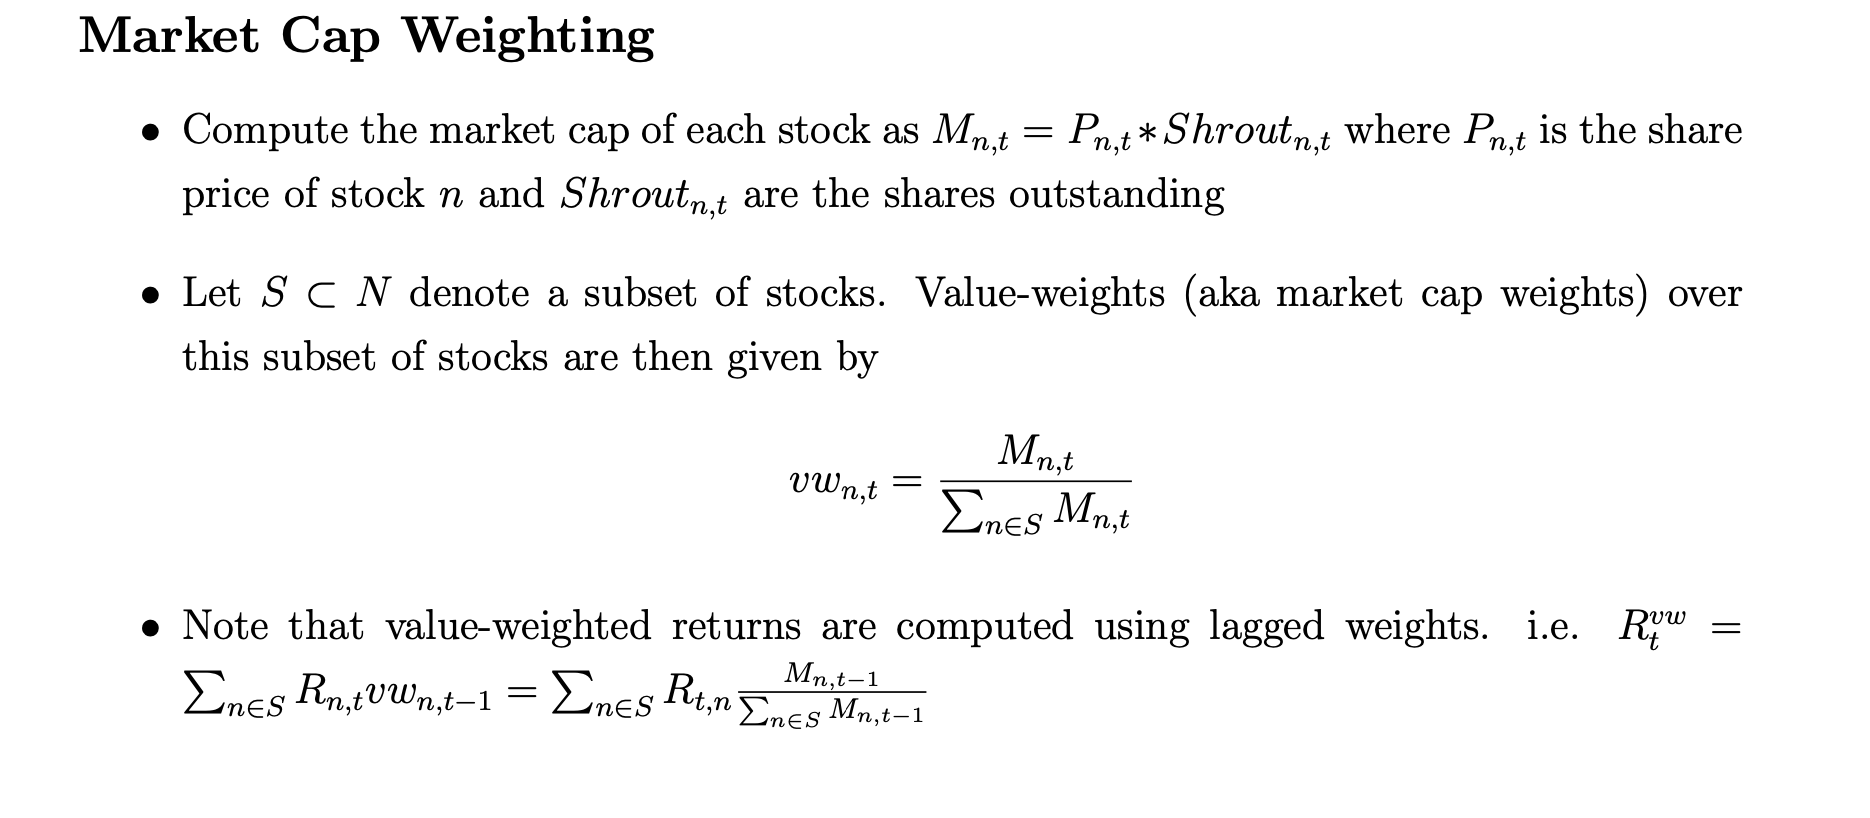

In [23]:
df3 = portfolio.copy()
df4 = eqw_portfolio.copy()

In [24]:
#compute the beta of the portfolio excess returns based with respect to the market excess return for the full sample

portfolio_grouped = df3.groupby("decile", group_keys=True)
# filter return a dataframe not a groupby dataframe, so we need to groupby again 

portfolio_parameters = pd.DataFrame(columns=['decile','alpha','beta','R2','avg ret'])

for group in portfolio_grouped.groups.keys():
    data = portfolio_grouped.get_group(group)
    data = data.dropna()
    y = data.vwret - data.tmytm
    x = data.vwretd - data.tmytm
    x = sm.add_constant(x)
    regression = sm.OLS(y, x).fit()
    portfolio_parameters.loc[len(portfolio_parameters)] = [group,regression.params['const'],regression.params[0],regression.rsquared,data['vwret'].mean()]

Text(0, 0.5, 'average annual portfolio return')

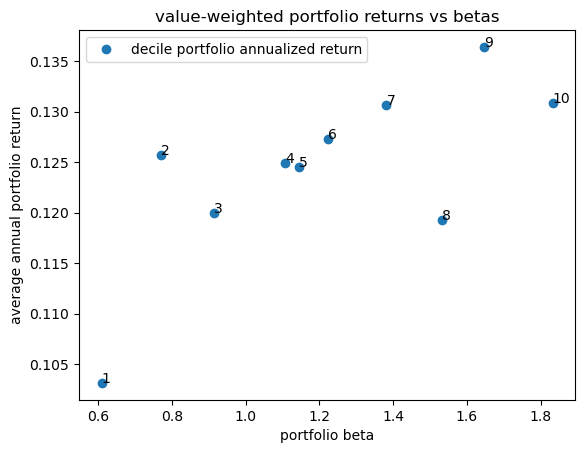

In [25]:
portfolio_parameters['annualized ret'] = portfolio_parameters['avg ret']*12
# Plot of the 10 average portfolio returns for the full sample versus the portfolios’ betas
portfolio_parameters.plot(x='beta', y='annualized ret', style='o',label='decile portfolio annualized return')
for dec in range(0,10):
    plt.text(portfolio_parameters['beta'][dec], portfolio_parameters['annualized ret'][dec], dec+1, fontsize=10)
plt.title("value-weighted portfolio returns vs betas")
plt.xlabel("portfolio beta")
plt.ylabel("average annual portfolio return")

In [26]:
#compute the beta of the portfolio excess returns based with respect to the market excess return for the full sample

eqw_portfolio_grouped = df4.groupby("decile", group_keys=True)
# filter return a dataframe not a groupby dataframe, so we need to groupby again 

eqw_portfolio_parameters = pd.DataFrame(columns=['decile','alpha','beta','R2','avg ret'])

for group in eqw_portfolio_grouped.groups.keys():
    data = eqw_portfolio_grouped.get_group(group)
    data = data.dropna()
    y = data.eqwret - data.tmytm
    x = data.vwretd - data.tmytm
    x = sm.add_constant(x)
    regression = sm.OLS(y, x).fit()
    eqw_portfolio_parameters.loc[len(eqw_portfolio_parameters)] = [group,regression.params['const'],regression.params[0],regression.rsquared,data['eqwret'].mean()]

Text(0, 0.5, 'average annual portfolio return')

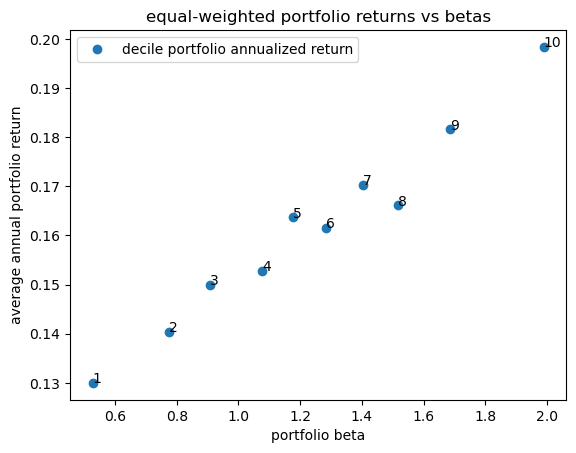

In [27]:
eqw_portfolio_parameters['annualized ret'] = eqw_portfolio_parameters['avg ret']*12
# Plot of the annualized 10 average portfolio returns for the full sample versus the portfolios’ betas
eqw_portfolio_parameters.plot(x='beta', y='annualized ret', style='o',label='decile portfolio annualized return')
for dec in range(0,10):
    plt.text(eqw_portfolio_parameters['beta'][dec], eqw_portfolio_parameters['annualized ret'][dec], dec+1, fontsize=10)
plt.title("equal-weighted portfolio returns vs betas")
plt.xlabel("portfolio beta")
plt.ylabel("average annual portfolio return")

In general, when estimating betas for diversified portfolios one can be more precise than when estimating beta for individual stocks.
By using portfolios in cross-sectional regressions of average returns on betas we can reduce estimation errors, the disadvantage being that it shrinks the range of betas and lowers statistical inference. To remedy this, portfolios can be formed on beta (by grouping from lowest beta to highest, for each month).

## c)

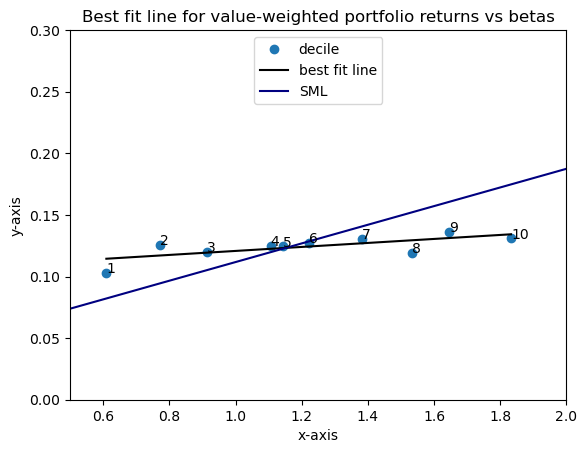

In [28]:
# Calculating parameters of the line 
vw_coefs = np.polyfit(portfolio_parameters['beta'],portfolio_parameters['annualized ret'], 1)
vw_line = vw_coefs[1] + vw_coefs[0] * portfolio_parameters['beta']
# Plotting the data points, the best fit line and the SML
portfolio_parameters.plot(x='beta', y='annualized ret', style='o',label='decile')
plt.plot(portfolio_parameters['beta'], vw_line,c='black',label='best fit line')
for dec in range(0,10):
    plt.text(portfolio_parameters['beta'][dec], portfolio_parameters['annualized ret'][dec], dec+1, fontsize=10)
plt.title('Best fit line for value-weighted portfolio returns vs betas')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
x=np.linspace(0,2,100)
sml=t_bill['tmytm'].mean()*12+x*(vw_market['vwretd']-t_bill['tmytm']).mean()*12
plt.plot(x,sml,linestyle='-', c='navy',label='SML')
plt.xlim(0.5,2)
plt.ylim(0,0.3)
plt.legend(loc='upper center')
plt.show()


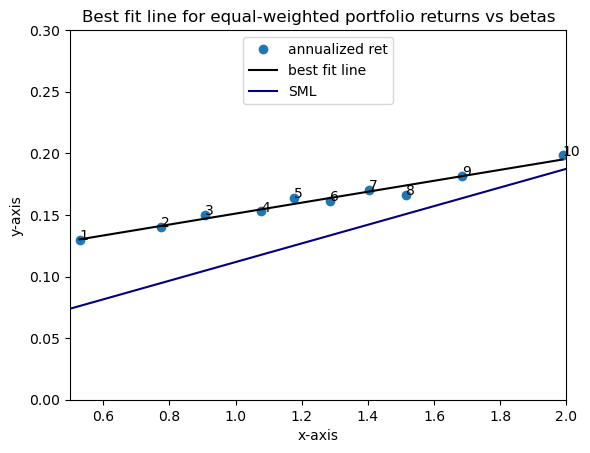

In [29]:
# Calculating parameters of the line 
eqw_coefs = np.polyfit(eqw_portfolio_parameters['beta'],eqw_portfolio_parameters['annualized ret'], 1)
eqw_line = eqw_coefs[1] + eqw_coefs[0] * eqw_portfolio_parameters['beta']
# Plotting the data points, the best fit line and the SML
eqw_portfolio_parameters.plot(x='beta', y='annualized ret', style='o')
plt.plot(eqw_portfolio_parameters['beta'], eqw_line, c='black',label='best fit line')
for dec in range(0,10):
    plt.text(eqw_portfolio_parameters['beta'][dec], eqw_portfolio_parameters['annualized ret'][dec], dec+1, fontsize=10)
plt.title('Best fit line for equal-weighted portfolio returns vs betas')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.plot(x,sml,linestyle='-', c='navy',label='SML')
plt.xlim(0.5,2)
plt.ylim(0,0.3)
plt.legend(loc='upper center')
plt.show()

In [33]:
# calculate the average market excess return for the full sample
avg_market_excess_return = (df3['vwretd']- df3['tmytm']).mean()*12
print('average market excess return:', round(avg_market_excess_return,4))
print('slope of best fit line for the equally weighted portfolio:',round(eqw_coefs[0],4))
print('slope of best fit line for the value weighted portfolio:',round(vw_coefs[0],4))


average market excess return: 0.0757
slope of best fit line for the equally weighted portfolio: 0.0444
slope of best fit line for the value weighted portfolio: 0.0162


If the CAMP were true, all the stocks would lie on the security market line. However, we see that the value-weighted portfolios seem to be closer to the security market line with respect to the equally weighted portfolios. In both cases the slope of the fitted line is flatter than the slope of the security market line (more specifically, the slope for the value weighted returns is smaller than the one for the equally weighted returns), and the intercept is higher for the best fitting line than it is for the security market line.

Nevertheless, beta correlates positively with the average expected return. Some of these findings are consistent with the CAPM, as for example the positive correlation between beta and the average expected return, while other are not consistent with it: the problem of the intercept is important since in the sample the intercept is almost twice the intercept of the security market line (the risk free rate). This may happen because the CAPM assumes that an investor can borrow or lend infinite amount at the risk free rate while in the reality there are some constraints.\
One of the application of the CAPM theory is to provide a benchmark for stocks analysis: using the intercept alpha from the regression we can identify overvalued and undervalued securities. When alpha is negative the CAPM overvalued the security, while when alpha is positive the CAPM undervalued the security. In the former case the investor is better off shorting the stock while in the latter case the investor can go long in the security/portfolio, eventually borrowing at the risk free rate, to gain from the asymmetry. 
Another difference between CAPM (the SML) and the the statistical model (regression and best fit line) is that the CAPM imposes the constraint that the intercept (alpha) is zero.

The equally weighted profolio shows higher returns than the value weighted portfolio. This may validate the idea small-cap stocks outperform markets (and big cap stocks) on a regular basis, where the effect is reduced when the portfolio is equally weighted because we give less weight to these small cap stocks. 